In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import re, os
from scipy.stats import gaussian_kde
from asymmetric_kde import ImproperGammaEstimator

## Plot data from V1 for B1, B2

In [2]:
def read_tem_stats_file(filename):
    stats = pd.read_csv(filename)
    match = re.search(r"_([\d]+)\.csv$", filename)
    shape = int(match.group(1))
    if shape==0:
        data = stats["Length"].to_numpy()
    else:
        lengths = stats["Length"].to_numpy()
        n_items = lengths.shape[0]
        data = lengths.reshape(int(n_items/2), 2)

    return shape, data

In [3]:
def plot_histogram_with_kde(ax, data):
    kde = ImproperGammaEstimator(data, 'plugin')

    x_range = np.linspace(min(data), max(data), 100)
    ax.hist(data, bins=30, density=True, alpha=0.5, label='Histogram')
    ax.plot(x_range, kde(x_range), color='red', label='KDE')
    return 

Text(0.5, 0.98, './imageJ/A8_0.csv')

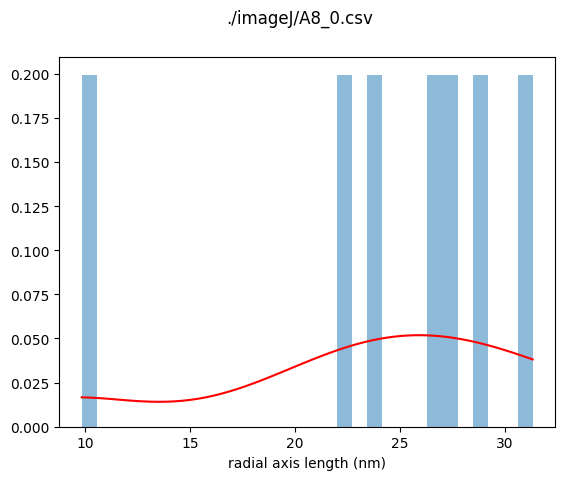

In [4]:
filename = "./imageJ/A8_0.csv"
shape, data = read_tem_stats_file(filename)
savename = os.path.basename(filename).rsplit(".", 1)[0]

if shape==0:
    fig, ax = plt.subplots()
    plot_histogram_with_kde(ax, data)
    ax.set_xlabel("radial axis length (nm)")
else:
    fig, axs = plt.subplots(1,3, figsize=(4*3, 4))
    plot_histogram_with_kde(axs[0], data[:,0])
    axs[0].set_xlabel("Longer axis length (nm)")
    plot_histogram_with_kde(axs[1], data[:,1])
    axs[1].set_xlabel("Shorter axis length (nm)")
    plot_histogram_with_kde(axs[2], data[:,0]/data[:,1])
    axs[2].set_xlabel("Aspect ratio")    

fig.suptitle(filename)
# plt.savefig("./hists/%s.png"%savename)    

## Plot data from V2 

In [18]:
def plot_histogram_with_kde(ax, data, limits=[0,1]):
    kde = ImproperGammaEstimator(data, 'plugin')

    x_range = np.linspace(limits[0], limits[1], 100)
    ax.hist(data, bins=30, density=True, alpha=0.75, label='Histogram')
    ax.set_ylabel("Probability Density")
    ax2 = ax.twinx()
    ax2.plot(x_range, kde(x_range), color='red', label='KDE')
    ax2.set_ylabel("Kerel Density Estimate")
    ax.set_xlim(limits)

    return ax, ax2 

In [45]:
filename = "./250201_AuNP_Kiran_Huat/B2_13/Results.csv"
savename = filename.split("/")[-2].split("_")[0]
stats = pd.read_csv(filename)
measurements = stats["Length"].to_numpy().reshape(int(len(stats)/2), 2)
aspect_ratios = measurements[:,0]/measurements[:,1]

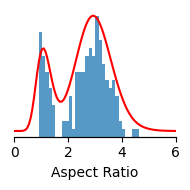

In [46]:
fig, ax = plt.subplots(figsize=(2,2))
ax, ax2 = plot_histogram_with_kde(ax, aspect_ratios, limits=[0.0, 6.0])
ax.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)
ax.spines[["left", 'right', 'top']].set_visible(False)
ax2.spines[["left", 'right', 'top']].set_visible(False)
ax.set_xlabel("Aspect Ratio")
plt.tight_layout()
plt.savefig("./hists/%s.png"%savename) 
plt.show()

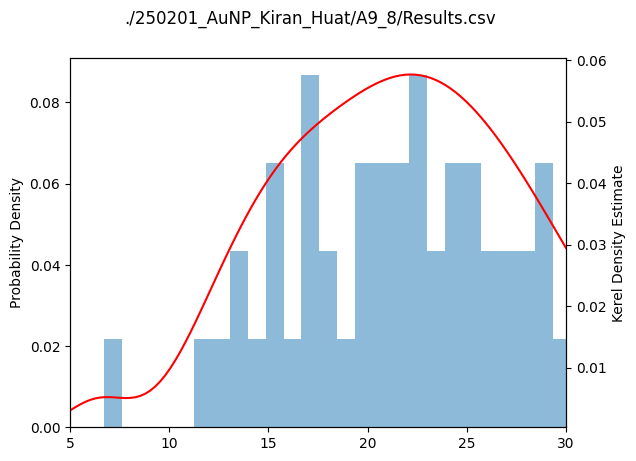

In [8]:
sphere_flags = aspect_ratios<1.5
diameters = measurements[sphere_flags,:].mean(axis=1)
fig, ax = plt.subplots()
plot_histogram_with_kde(ax, diameters, limits=[5.0, 30.0])
fig.suptitle(filename)
plt.savefig("./hists/%s_0.png"%savename) 
plt.show()

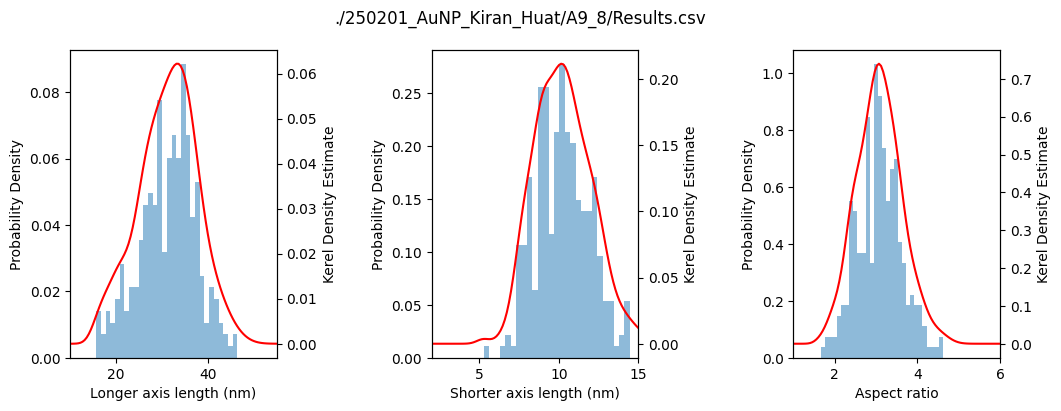

In [9]:
rod_flags = aspect_ratios>1.5
major_axis = measurements[rod_flags,0]
minor_axis = measurements[rod_flags,1]
ratios = major_axis/minor_axis
fig, axs = plt.subplots(1,3, figsize=(4*3, 4))
fig.subplots_adjust(wspace=0.75)
plot_histogram_with_kde(axs[0], major_axis, limits=[10.0, 55.0])
plot_histogram_with_kde(axs[1], minor_axis, limits=[2.0, 15.0])
plot_histogram_with_kde(axs[2], ratios, limits=[1.0, 6.0])
axs[0].set_xlabel("Longer axis length (nm)")
axs[1].set_xlabel("Shorter axis length (nm)")
axs[2].set_xlabel("Aspect ratio")    

fig.suptitle(filename)
plt.savefig("./hists/%s_1.png"%savename)  
plt.show()